<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/NLP/5_Atencion/Atencion.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>

# Traducción humana

Olvidemos por un momento lo que hemos visto hasta aquí de redes recurrentes

Pensemos en un segundo como es que uno traduce normalmente. Como ejemplo de un idioma extraño, tomaremos el japonés. 

##あの人はミカンを食べた。
>_aru hito wa mikan o tabeta_

En esta breve oración vemos todos los tipos de caracteres que se usan en el japonés. A saber:

* hiragana: あ, の, は, を, べ, た
* katakana:ミ, カ, ン
* kanji: 人, 食
* puntuación: 。

Normalmente, son los los caracteres hiragana y katakana los primeros en ser aprendidos y corresponden a silabas. Esto carecen de valor semántico y solo son silabas. El mayor problema suelen ser lo kanji. Hay alrdedor de 2000 kanji de uso diario más otros 2000 en topónimos, términos específicos o nombres técnicos. Dada lo complejidad de estos carateres, existen *diccionarios*, no solo para los extranjeros, sino también para los locales

El lector interesado puede usar [jisho.org](http://www.jisho.org) para buscar esos caracteres. No es nuestro interes enseñar a usar esa página, sino usarla para obtener información. En jisho.org, se nos informa lo siguiente:

* 人: _persona, alguien_
* 食: _comida, comestible_

Solo buscando caracteres y algo más ya sabemos que hay algo de una persona y una comida.

Si bien hemos terminado con la parte más pesada (busqueda de kanji) nos queda entender que hacen el resto de las partes de nuestra oración.

A diferencia del español o el inglés, la noción de palabra en el japonés o el chino carecen de sentido. La razón para señalar esto es algo que el lector notará rápidamente: no hay espacios entre los caracteres. Por lo tanto debemos separar los símbolos en conjuntos de caracteres con contenido gramatical. 

> Nota: ¡Esto es literamente lo que hacemos cuando tokenizamos! Pero debemos consistentes con la primera oración de esta sección: ***Olvidemos por un momento lo que hemos visto hasta aquí de redes recurrentes***. Es decir, estamos suponiendo que ni siquiera sabemos que es tokenizar.

Pues bien, pasemos ahora a separar estas partes. 

##あの,$~~$人,$~~$は,$~~$ミカン,$~~$を,$~~$食べた,$~~$。

Usaremos ahora nuestro **diccionario**, jisho.org para ver que nos dice de esto:

* ある → 彼の: aquel
* 人: persona
* は: indica el tema de la oración
* ミカン → 蜜柑 : mandarina
* を: indica objeto directo
* 食べた → 食べる: comer
* 。: punto final (jisho.org parece no tener este carater)

Hemos usado "→" para indicar cual es la entrada del ***diccionario*** para ese caso. En función de lo anterior podemos pensar que nuestra oración dice algo como lo siguiente:

##(aquel) (persona) (**tema**) (mandarina) (**objeto directo**) (comer) (punto final)

por lo tanto no debemos esforzarnos mucho más para llegar a la conclusión de que esa oración debería traducirse como:

## Aquella persona comió una mandarina.

Para contruir esa oración hemos usado mucha información adicional propia del español. Además hay información de la gramática japonesa que hemos omitido:

* En español, por lo general, el objeto directo va a continuación de un verbo. por eso no necesitamos marcarlo, a diferencia del japones.
* Es español, la mayoría de las veces el tema de la oración está al principio de la misma. Compare:
  * Aquella persona comió una mandarina
  * Una mandarina es lo que comió aquella perona
* En japones casi todas las terminaciones -た indican pasado, por eso pusimos "comió".

Vemos que la noción de un ***DICCIONARIO*** es una idea muy útil y podría ser de gran ayuda para traducir texto. Por esta razón, uno quisiera tener uno. Curiosamente, `python` tiene una estructura de datos llamada `dictionary`. Sería interesante poder ver si esta estructura nos puede ayudar.

# Diccionarios en `python`

Si usted sabe algo de estructura de datos, solo diremos que los diccionarios de python son tablas de hashes. 

Si usted tiene alguna información sobre hardware y electrónica o arquitectura de las computadoras, solo diremos que un diccionario de python tiene un comportamiento similar a las memorias asociativas usadas en el cache de una PC. 

Si usted no cae en ninguna de esas dos categorías. Haremos una muy pequeña introducción a como es que un diccionario en `python` busca los diferentes datos almacenados en el.

Como dijimos más arriba, un diccionario de Python es una tabla de hashes. Esto quiere decir que se intenta que tanto la búsqueda, como la inserción o la eliminación de un dato ocurra en el menor tiempo posible. Formalmente se busca que los algortimos no dependan de la cantidad de elementos en almacenados en el diccionario. Para hacer esto, se usa una función llamanda "función hash". 

### Funciones de hash

La idea de una función de hash, es crear una función que para cualquier dato devuelva un valor único o al menos un valor que sea muy poco probable volver generar. Es decir:

Si al string "perro" le corresponde el hash 3262323, deber ser imposible o almenos muy poco probable que haya otro string que genere 3262323. De igual modo, dado 3262323 deberíamos ser capaces de obtener "perro". Pero la forma de hacerlo debería ser lo suficientemente complicada como para que no tenga sentido hacerlo.

El nombre "hash" proviene de los llamados "hash brown" una suerte de tortilla de papa que se prepara sin huevo. En principio, uno puede desarmar el hash brown para obtener la papa original, pero el tiempo que requeriría hacerlo es mucho mayor al necesesario para comer el hash. De allí se dice que proviene el nombre.

Para la mayoría de las aplicaciones, la reversibilidad o la biyección de la función de hash no es necesaria. En la mayoría de las aplicaciones, solo necesitamos que la probabilidad de encontrar 2 hashes iguales sea muy baja. Por ejemplo, hablamos de probabilidades menores a  $1:2^{32}\sim1:10^9$

### Tablas de hashes

En líneas generales, para insertar un nuevo valor en nuestra tabla de hashes lo que hacemos es lo siguiente:
```
def replace(table, key, value)
    hash = hash_function(key)
    table[hash] = (key, value)
```
En este caso, hemos elegido reemplazar el viejo par de `(key, value)` por uno nuevo. Sin embargo, podríamos elegir revisar si el viejo `key` ya estaba y luego insertarlo en caso de que no estuviera. También podríamos elegir almacenar una lista de keys con igual hash, despues de todo la probabilidad de contrar dos iguales es pequeña, pero no cero. El problema de la colisión (¿qué hacer cuando 2 keys coinciden?) es algo que dependerá de la aplicación, así como de las necesidades y decisiones de diseño. Por suerte, `python` ya ha tomado estas decisiones por usted y también provee soluciones alternativas como en el modulo `collections`

De alguna manera, está discusión sobre diccionarios nos da una alternativa al problema de la traducción. Podríamos tener una especie de diccionario con todas las palabras del inglés como keys y todas las palabras del español como values. De esa manera, aprenderíamos que palabras se traducen como cuales. El problema de esto es múltiple:

* Las lenguas humanas no funciónan así. Fijese en el ejemplo anterior como el caracter を no tiene un correspondiente en el español
* ¿Que pasa con palabras homofonas y de diferente valor semántico? ¿Como definiríamos a cual hacerle caso?
  * Frente al banco, había una plaza con bancos verdes
* ¿Que pasa con palabras nuevas que no están en nuestro diccionario? 
* ¿Podríamos **entrenar** una estructura de estas características?

Esta última pregunta es la que está en el centro de la discusión. El diccionario que planteamos es en esencia una entidad discreta. Si la palabra no está en nuestro diccionario (si no hay colisión) no obtenemos traducción. Mientras que nuestras redes son continuas, si encuentran algo levemente distinto a algo que ya vieron lo reconoceran. Además, es esa continuidad la que permite el entrenamiento, pues nos permite buscar mínimos para nuestra función de pérdidad. Lo que ahora intentaremos será construir una función que haga las veces de un diccionario continuo.

# Atención


Discutamos por un segundo como es el acceso a un diccionario. Usaremos también python como guía para un pseudocódigo:

```
def access(table, query):
    hash = hash_function(query) # usamos un hash
    if table[hash].key == query: # vemos si encontramos algo
        return table[hash].value # lo devolvemos.
    return None # si no hay nada devolvemos None.
```

En realidad, la primera parte del diccionario ya la tenemos resulta. En efecto, nuestras redes recurrentes convierten cada token en un vector de dimensión arbitraria. Convierten un string en una serie de números. No es un índice, como lo hace una función de hash. Pero una red recurrente es función que suponemos lo suficientmente potente como para guardar todo lo que la red ha visto hasta ese momento. 

Ahora, lo que necesitamos resuelver es el problema de las últimas 3 líneas. En las últimas 3 líneas decimos que devolveremos algo **solámente** si la coincidencia es total. Es aquí donde tenemos algo que podemos suavizar y la respuesta nos la da las compuertas de LSTM y GRU. Habíamos dicho que en una memoria real, usabamos 1 y 0 para activar o desactivar el guardado de información. Nuestra solución en ese caso fue suavizar (smoothing) logrando una salida entre 0 y 1, en lugar de solo 0 o 1. Aquí haremos algo parecido.

En esencia, lo que hacemos en el código anterior es devolver `table[hash].value` si la similitud entre nuestra consulta `query` y alguna clave de nuestro diccionario `table[hash].key` es total. Como ahora queremos generar un diccionario continuo y entrenable, debemos definir una función de similitud. Esta función de similitud actuará comparando `query` y `table[hash].key` y deberá dar 1 si la coincidencia es total o 0 si no hay coincidencia. Además podrá devolver cualquie valor intermedio entre 1 y 0

Al trabajar con similitudes, podemos ahora cuantificar la similitud entre cada una de las claves `kys` dentro de `table` y el valor `query` que nosotros usamos para consultar el diccionario. Los valores de similitud nos dicen que tan parecida debe ser la salida a cada `value` almacenado. Si la similitud entre `key1` y `query` es 1, la salida sera `value1`. Si la similitud es 0, `value1` no contribuira a la salida. Sea $f(\mathbf{q}_i,\mathbf{k}_j)$ una función similitud entre la $i$-ésima consulta $\mathbf{q}_i$ y la $j$-ésima clave $\mathbf{k}_j$, entonces la salida de nuestro diccionario está dada por:

$$\mathbf{o}_j = \sum_{i=0}^{N}f(\mathbf{q}_j,\mathbf{k}_i)\mathbf{v}_i$$

Donde $\mathbf{v}_i$ es el $i$-ésimo valor asociado a la $i$-ésima clave $\mathbf{k}_i$

En resumen, un **mecanismo de atención** compara consultas con claves preexistentes y devuelve una combinación lineal de valores, donde los pesos son la similitud entre cada clave y la consulta. La principal diferencia entre los mecanismo de atención en abstracto y el mecanismo de **atención de Bahdanau** es que en el caso del mecanismo de Bahdanau, las claves $\mathbf{k}_i$ y los valores $\mathbf{v}_i$ coinciden.

![](https://i.imgur.com/qcxZdzX.gif)


## Funciones de atención

Mencionaremos aquí 3 de las funciones de similitud más usadas en atención de Bahdanau

### Atención aditiva

Está es probablemente la más evidente de las 3. Dado que queremos generar una función entrenable en el contexto de redes neuronales, ¿Porque no usar MLP?

En efecto, se define un MLP de 2 capas, como una función de similitud.

$$\mathbf{h}_{ij} = \tanh(\mathbf{W}_{hq}\mathbf{q}_j+\mathbf{W}_{hk}\mathbf{k}_i)$$

$$s_{ij} = \text{softmax}(\mathbf{w}_{h}\mathbf{h}_{ij})$$

$$\mathbf{o}_j = \sum_{i=0}^{N}s_{ij}\mathbf{v}_i$$


### Atención con producto escalar.

Está es la más sencilla de las 3. Por lo general, cuando uno piensa en medidas de simiitud, el producto escalar es la primera en ser mencionada. Por esto definimos la similitud de la siguiente manera:

$$s_{ij} = \text{softmax}\left(\dfrac{\mathbf{q}^\top_j\mathbf{k}_i}{\sqrt{d}}\right)$$

$$\mathbf{o}_j = \sum_{i=0}^{N}s_{ij}\mathbf{v}_j$$

En este caso, necesitamos que $\mathbf{q}_j$ y $\mathbf{k}_i$ tengan la misma dimensión. Además, hemos supuesto que ambos vectores siguen una distribución normal, por eso que que los normalizamos usando $d$, el número de componentes del vector. Por último, para segurarnos de que se comporten como una similitud, aplicamos $\text{softmax}$ a lo largo de cada clave $\mathbf{k}_i$. Con estos valores generamos la combinación lineal de valores.

### Producto escalar generalizado. 

La idea es simplmente una continuación de lo anterior. En lugar de usar el producto escalar, usaremos una generalización del producto escalar. Para ello usaremos una matriz entre $\mathbf{q}_j$ y $\mathbf{k}_i$

$$s_{ij} = \text{softmax}\left(\dfrac{\mathbf{q}^\top_j\mathbf{W}_{qk}\mathbf{k}_i}{\sqrt{d}}\right)$$

$$\mathbf{o}_j = \sum_{i=0}^{N}s_{ij}\mathbf{v}_j$$

Un detalle de esta implementación es que para usar correctamente a los pesos $\mathbf{W}_{qk}$ debemos crearlos con el constructor `nn.Bilinear` de `torch`, seteando el atributo `bias` en `False`



# Usando atención.

A partir de los discutido en la clase de Seq2Seq, veremos que modificacioens hemos hecho al código. Primero importaremos las mismas interfaces que habíamos usado en la clase anterior

In [ ]:
import torch
import torch.nn as nn
class Encoder(nn.Module):
    def __init__(self):
        super().__init__()

    # Más tarde puede haber argumentos adicionales
    # (por ejemplo, longitud para excluir el relleno)
    def forward(self, X, *args):
        raise NotImplementedError

In [ ]:
class Decoder(nn.Module):

    def __init__(self):
        super().__init__()

    # Más tarde puede haber argumentos adicionales
    # (por ejemplo, longitud para excluir el relleno)
    def init_state(self, enc_outputs, *args):
        raise NotImplementedError

    def forward(self, X, state):
        raise NotImplementedError

In [ ]:
class EncoderDecoder(nn.Module):
    def __init__(self, encoder, decoder):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, enc_X, dec_X, *args):
        enc_outputs = self.encoder(enc_X, *args)
        dec_state = self.decoder.init_state(enc_outputs, *args)
        return self.decoder(dec_X, dec_state)[0]

Luego analicemos los cambios que hemos hecho al encoder. La principal diferencia en este caso es que usaremos una sola capa de GRU, pero la haremos bidimensional

In [ ]:
def init_RNN(module):
    if type(module) == nn.Linear:
         nn.init.xavier_uniform_(module.weight)
    if type(module) == nn.GRU:
        for param in module._flat_weights_names:
            if "weight" in param:
                nn.init.xavier_uniform_(module._parameters[param])

class ATTNEncoder(Encoder):
    def __init__(self, input_dim, emb_dim, enc_hid_dim, dec_hid_dim, dropout):
        super().__init__()
        self.embedding = nn.Embedding(input_dim, emb_dim)
        self.rnn = nn.GRU(emb_dim, enc_hid_dim, bidirectional = True)
        self.fc = nn.Linear(enc_hid_dim * 2, dec_hid_dim)        
        self.dropout = nn.Dropout(dropout)
        self.apply(init_RNN)
    """
    Diferencias con el código de la clase anterior:
        * Trabajamos con 1 sola capa
        * RNN bidireccional ¿Que ventaja trae?
        * Aplicamos un capa densa adicional para convertir la
          salida bidireccional en una unidireccional
        * Hay variables que no estamos guardando como la dimensión
          de los estados ocultos.
    """
        
    def forward(self, src):
        
        #src = [src len, batch size]
        embedded = self.dropout(self.embedding(src))
        
        #embedded = [src len, batch size, emb dim]
        outputs, hidden = self.rnn(embedded)
        
        """
        Necesitamos adapatar la salida bidireccional del encoder
        a la salida unidireccional del decore (¿Por qué?)
        """
                
        #outputs = [src len, batch size, hid dim * num directions]
        #hidden = [n layers * num directions, batch size, hid dim]
        
        #hidden --> [forward_1, backward_1, forward_2, backward_2, ...]
        #outputs son siempre de la última capa
        
        #hidden [-2, :, : ] último forwards RNN 
        #hidden [-1, :, : ] último backwards RNN
        
        """
        Concatenamos el último estado y lo metemos en una capa densa
        """
        hidden = torch.tanh(self.fc(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1)))
        
        #outputs = [src len, batch size, enc hid dim * 2]
        #hidden = [batch size, dec hid dim]
        
        return outputs, hidden

Ahora en la última dimensión de `outputs`, tenemos el doble de dimensiones que en `num_hidden`. Justamente, tenemos una 

In [ ]:
vocab_size, embed_size, num_hiddens, num_layers = 10, 8, 16, 2
batch_size, num_steps = 4, 9

encoder = ATTNEncoder(vocab_size, embed_size, num_hiddens, num_hiddens, 0.5)
X = torch.zeros((num_steps, batch_size), dtype=torch.int32)
outputs, state = encoder(X)
print(outputs.shape, (num_steps,batch_size,num_hiddens * 2))
print(state.shape, (batch_size, num_hiddens))

torch.Size([9, 4, 32]) (9, 4, 32)
torch.Size([4, 16]) (4, 16)


Ahora debemos adapatar las salidas del encoder para que puedan ser procesadas por el mecanismo de atención y por el decoder.

In [ ]:
class ATTNDecoder(Decoder):
    def __init__(self, output_dim, emb_dim, enc_hid_dim, dec_hid_dim, dropout, attention):
        super().__init__()

        self.attention = attention #atención!

        self.embedding = nn.Embedding(output_dim, emb_dim)
        self.rnn = nn.GRU((enc_hid_dim * 2) + emb_dim, dec_hid_dim)
        self.fc_out = nn.Linear((enc_hid_dim * 2) + dec_hid_dim + emb_dim, output_dim)
        self.dropout = nn.Dropout(dropout)
        self.output_dim = output_dim
        self.apply(init_RNN)
    """
    Diferencias con el código de la clase anterior:
        * Trabajamos con 1 sola capa
        * hay variables que no estamos guardando como la dimensión
          de los estados ocultos.
    """

    """
    Como el estado inicial hidden lo generamos con una capa densa,
    ahora no podemos recuperarlo sin llamar al encoder.
        El método init_state queda sin implementar!
    """ 
    
    def forward(self, input, hidden, encoder_outputs):
             
        #input = [batch size]
        #hidden = [batch size, dec hid dim]
        #encoder_outputs = [src len, batch size, enc hid dim * 2]
        
        input = input.unsqueeze(0)
        #input = [1, batch size]
        
        """
        Ahora aplicamos dropout
        """
        embedded = self.dropout(self.embedding(input))
        #embedded = [1, batch size, emb dim]

        """
        Llamamos a la función de atención para generar los pesos
        que usaremos para calcular el estado oculto que necesita 
        el decoder
        """
        a = self.attention(hidden, encoder_outputs)        
        #a = [batch size, src len]
        
        a = a.unsqueeze(1) # pesos
        #a = [batch size, 1, src len]
        
        encoder_outputs = encoder_outputs.permute(1, 0, 2)
        #encoder_outputs = [batch size, src len, enc hid dim * 2]
        
        """
        Aplicamos multplicación de matrices por minilotes:
            batch matrix multiplication = bmm
        Esta función recibe dos minilotes de matrices y luego los 
        multiplica elemento a elemento
            result = []
            for A, B in zip (batch_A, batch_B):
                C = A @ B
                result.append(C)
        """
        weighted = torch.bmm(a, encoder_outputs)
        #weighted = [batch size, 1, enc hid dim * 2]
        
        weighted = weighted.permute(1, 0, 2)
        #weighted = [1, batch size, enc hid dim * 2]

        """
        Concatenamos para luego pasar el valor a RNN
        """
        rnn_input = torch.cat((embedded, weighted), dim = 2)
        #rnn_input = [1, batch size, (enc hid dim * 2) + emb dim]
            
        output, hidden = self.rnn(rnn_input, hidden.unsqueeze(0))
        
        #output = [seq len, batch size, dec hid dim * n directions]
        #hidden = [n layers * n directions, batch size, dec hid dim]
        
        """
        En este caso seq len, n layers, n directions valen 1
        output = [1, batch size, dec hid dim]
        hidden = [1, batch size, dec hid dim]
        """

        embedded = embedded.squeeze(0)
        output = output.squeeze(0)
        weighted = weighted.squeeze(0)
        
        """
        Capa final.
        """
        prediction = self.fc_out(torch.cat((output, weighted, embedded), dim = 1))
        
        #prediction = [batch size, output dim]
        
        return prediction, hidden.squeeze(0)

Por último analicemos nuestro mecanismo de atención.

In [ ]:
import torch.nn.functional as F
class Attention(nn.Module):
    def __init__(self, enc_hid_dim, dec_hid_dim):
        super().__init__()
        
        """
            Recordemos que tenemos 2 MLP:
                * Uno para el output del encoder
                * otro para generar el estado oculto.
        """
        self.attn = nn.Linear((enc_hid_dim * 2) + dec_hid_dim, dec_hid_dim)
        self.v = nn.Linear(dec_hid_dim, 1, bias = False)
        
    def forward(self, hidden, encoder_outputs):
        
        #hidden = [batch size, dec hid dim]
        #encoder_outputs = [src len, batch size, enc hid dim * 2]
        
        batch_size = encoder_outputs.shape[1]
        src_len = encoder_outputs.shape[0]

        """
        Repetimos el estado oculto del decoder src_len veces
        """
        hidden = hidden.unsqueeze(1).repeat(1, src_len, 1)

        # hidden = [batch size, 1, dec hid dim]

        # hidden = [batch size, src len, dec hid dim] 
        #                        ^ todos estos índices son iguales

        """
        Cambiamos el orden de los índice.
        """
        encoder_outputs = encoder_outputs.permute(1, 0, 2)
        
        #hidden = [batch size, src len, dec hid dim]
        #encoder_outputs = [batch size, src len, enc hid dim * 2]
        
        """
        Aplicamos primera capa de MLP
        """
        energy = torch.tanh(self.attn(torch.cat((hidden, encoder_outputs), dim = 2))) 
        
        #energy = [batch size, src len, dec hid dim]

        """
        Aplicamos segunda capa de MLP
        """
        attention = self.v(energy).squeeze(2)
        
        #attention= [batch size, src len]
        return F.softmax(attention, dim=1)

No hay grandes diferencias en nuestro Seq2Seq con teacher forcing. Solo hemos evitado usar el método `init_state`. La razón es que ahora esta cantidad es manejada por nuestro decoder por medio del mecanismo de atención. 

In [ ]:
import random
class ATTNSeq2Seq(EncoderDecoder):
    def __init__(self, encoder, decoder, device):
        super().__init__(encoder, decoder)
        self.device = device
        
    def forward(self, src, trg, teacher_forcing_ratio = 0.5):
        
        #src = [src len, batch size]
        #trg = [trg len, batch size]
        #teacher_forcing_ratio is probability to use teacher forcing
        #e.g. if teacher_forcing_ratio is 0.75 we use teacher forcing 75% of the time
        
        batch_size = src.shape[1]
        trg_len = trg.shape[0]
        trg_vocab_size = self.decoder.output_dim
        
        #tensor to store decoder outputs
        outputs = torch.zeros(trg_len, batch_size, trg_vocab_size).to(self.device)
        
        #encoder_outputs is all hidden states of the input sequence, back and forwards
        #hidden is the final forward and backward hidden states, passed through a linear layer
        encoder_outputs, hidden = self.encoder(src)
                
        #first input to the decoder is the <sos> tokens
        input = trg[0,:]

        """
        Como ahora usamos anteción, el estado inicial es manejado
        por el decoder.
        """
        
        for t in range(1, trg_len):
            
            #insert input token embedding, previous hidden state and all encoder hidden states
            #receive output tensor (predictions) and new hidden state
            output, hidden = self.decoder(input, hidden, encoder_outputs)
            
            #place predictions in a tensor holding predictions for each token
            outputs[t] = output
            
            #decide if we are going to use teacher forcing or not
            teacher_force = random.random() < teacher_forcing_ratio
            
            #get the highest predicted token from our predictions
            top1 = output.argmax(1) 
            
            #if teacher forcing, use actual next token as next input
            #if not, use predicted token
            input = trg[t] if teacher_force else top1

        return outputs

## Cargando los Datos



In [ ]:
import os.path
import re
from shutil import unpack_archive

data = None
#!wget -O spa-eng.zip http://www.manythings.org/anki/spa-eng.zip
if not os.path.isfile("spa.txt"):
    unpack_archive('./spa-eng.zip', extract_dir='./', format='zip')
with open('./spa.txt', encoding='utf-8') as f:
    data = f.read()
    data = re.sub("\tCC-BY 2\.0.*","",data) # acá elimino información adicional
    data = re.sub(r"[\u202f]|[\xa0]"," ",data) # aca saco caracteres raros
    data = re.sub("([,\.:;!?])"," \\1",data) # aca  y abajo tokenizo puntuación
    data = re.sub("([¡¿])","\\1 ",data).lower()


In [ ]:
print(data[:100])

go .	ve .
go .	vete .
go .	vaya .
go .	váyase .
hi .	hola .
run !	¡ corre !
run !	¡ corran !
run !	¡


In [ ]:
import random

SRC_IDX, TGT_IDX = 0, 1

SEED = 12312

data2 = data.split('\n')
random.seed(SEED)
random.shuffle(data2)

data_list = []
for i, line in enumerate(data2):
    parts = line.split('\t')
    if len(parts) == 2:
        # Skip empty tokens
        new_src = [t for t in f'{parts[SRC_IDX]} <eos>'.split(' ') if t]
        new_tgt = [t for t in f'<bos> {parts[TGT_IDX]} <eos>'.split(' ') if t]
        length_src = len(new_src)
        data_list.append((new_src, length_src, new_tgt))

print(data_list[0][0], data_list[0][-1])
print(len(data_list))

['tom', 'seldom', 'puts', 'sugar', 'in', 'his', 'coffee', '.', '<eos>'] ['<bos>', 'tom', 'casi', 'nunca', 'le', 'pone', 'azúcar', 'al', 'café', '.', '<eos>']
138440


In [ ]:
from collections import Counter
from torchtext.vocab import vocab

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

n = len(data_list)
split1, split2 = int(0.7*n), int(0.9*n)
train_list = data_list[:split1]
val_list = data_list[split1:split2]
test_list = data_list[split2:]

counter_src, counter_tgt = Counter(), Counter()
for i in range(len(train_list)):
  counter_src.update(train_list[i][0])
  counter_tgt.update(train_list[i][-1])

vocab_src = vocab(counter_src, min_freq = 2,
              specials=('<unk>', '<eos>', '<bos>', '<pad>'))
vocab_src.set_default_index(vocab_src['<unk>'])

vocab_tgt = vocab(counter_tgt, min_freq = 2,
              specials=('<unk>', '<eos>', '<bos>', '<pad>'))
vocab_tgt.set_default_index(vocab_tgt['<unk>'])


In [ ]:
from torch.utils.data.sampler import Sampler

class BucketSampler(Sampler):

    def __init__(self, batch_size, train_list):
        self.length = len(train_list)
        self.train_list = train_list
        self.batch_size = batch_size
        indices = [(i, s[1]) for i, s in enumerate(self.train_list)]
        random.seed(SEED)
        random.shuffle(indices)
        pooled_indices = []
        # creamos minilotes de tamaños similares
        for i in range(0, len(indices), batch_size * 100):
            pooled_indices.extend(sorted(indices[i:i + batch_size * 100],
                                         key=lambda x: x[1], reverse=True))

        self.pooled_indices = pooled_indices

    def __iter__(self):
        for i in range(0, len(self.pooled_indices), self.batch_size):
            yield [idx for idx, _ in self.pooled_indices[i:i + self.batch_size]]

    def __len__(self):
        return (self.length + self.batch_size - 1) // self.batch_size

In [ ]:
import torch

from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

SRC_PAD_IDX = vocab_src['<pad>']
TGT_PAD_IDX = vocab_tgt['<pad>']

def collate_batch(batch):
    text_src, length_list, text_tgt_in, text_tgt_out = [], [], [], []
    for (src, length, tgt) in batch:
        # convertimos el texto en tokens
        processed_src = torch.tensor([vocab_src[token] for token in src])
        processed_tgt = torch.tensor([vocab_tgt[token] for token in tgt])
        text_src.append(processed_src)
        text_tgt_in.append(processed_tgt[:-1])
        text_tgt_out.append(processed_tgt[1:])
        # guardamos la longitud de cada token
        length_list.append(length)
    # armamos la tupla que conformara un ejemplo de minilote.
    result = (pad_sequence(text_src, padding_value=SRC_PAD_IDX),
              pad_sequence(text_tgt_in, padding_value=TGT_PAD_IDX),
              pad_sequence(text_tgt_out, padding_value=TGT_PAD_IDX),)
    return result

In [ ]:
batch_size = 64  # A batch size of 64

train_bucket = BucketSampler(batch_size, train_list)
train_iter = DataLoader(train_list,
                          batch_sampler=train_bucket,
                          collate_fn=collate_batch)

val_bucket = BucketSampler(batch_size, val_list)
val_iter = DataLoader(val_list,
                          batch_sampler=val_bucket,
                          collate_fn=collate_batch)

test_bucket = BucketSampler(batch_size, test_list)
test_iter = DataLoader(test_list,
                          batch_sampler=test_bucket,
                          collate_fn=collate_batch)

In [ ]:
src, input, out = next(iter(test_iter))

a = [vocab_src.get_itos()[token] for example in src.T[:1] for token in example]
b = [vocab_tgt.get_itos()[token] for example in out.T[:1] for token in example]
c = [vocab_tgt.get_itos()[token] for example in input.T[:1] for token in example]

print(a)
print(b)
print(c)

['in', '1969', ',', 'roger', 'miller', '<unk>', 'a', 'song', 'called', '"you', "don't", 'want', 'my', 'love', '."', 'today', ',', 'this', 'song', 'is', 'better', 'known', 'as', '<unk>', 'the', 'summer', 'time', '."', "it's", 'the', 'first', 'song', 'he', 'wrote', 'and', 'sang', 'that', 'became', 'popular', '.', '<eos>']
['en', '1969', ',', 'roger', 'miller', 'grabó', 'una', 'canción', 'llamada', '<unk>', 'no', 'quieres', 'mi', '<unk>', '.', 'hoy', ',', 'esta', 'canción', 'es', 'más', 'conocida', 'como', '"en', 'el', '<unk>', '.', 'es', 'la', 'primera', 'canción', 'que', 'escribió', 'y', 'cantó', 'que', 'se', 'convirtió', 'popular', '.', '<eos>']
['<bos>', 'en', '1969', ',', 'roger', 'miller', 'grabó', 'una', 'canción', 'llamada', '<unk>', 'no', 'quieres', 'mi', '<unk>', '.', 'hoy', ',', 'esta', 'canción', 'es', 'más', 'conocida', 'como', '"en', 'el', '<unk>', '.', 'es', 'la', 'primera', 'canción', 'que', 'escribió', 'y', 'cantó', 'que', 'se', 'convirtió', 'popular', '.']


## Bucle de Entrenamiento

In [ ]:
def train(model, iterator, optimizer, criterion, clip):
    
    model.train()
    
    epoch_loss = 0
    
    for i, batch in enumerate(iterator):
        src, tgt_input, tgt_out = batch
        src, tgt_input, tgt_out = src.to(device), tgt_input.to(device), tgt_out.to(device)        
        #src: son las frases en el idioma origen que le pasaremos como entrada al encoder
        #src.shape : [src len, batch size]
        #tgt_input: son las frases en el idioma destino que le pasaremos como entrada al decoder (con `<bos>` como primer token y sin `<eos>`)
        #tgt_out: son las frases en el idioma destino que usaremos para calcular la pérdida (con `<eos>` como finalizador de oración y sin `<bos>`)
        #tgt.shape : [trg len, batch size]
        
        optimizer.zero_grad()
        output = model(src, tgt_input)
        #output = [trg len, batch size, output dim]
        
        output_dim = output.shape[-1]
        
        #como la función de pérdida solo funciona en entradas 2d con objetivos 1d,
        # necesitamos aplanar cada una de ellas con .view
        output = output[1:].view(-1, output_dim)
        trg = tgt_out[1:].view(-1)
        #trg = [trg len * batch size]
        #output = [trg len * batch size, output dim]
        
        #calculamos los gradientes
        loss = criterion(output, trg)
        loss.backward()

        #recortamos los gradientes para evitar que exploten
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        
        optimizer.step()
        epoch_loss += loss.item()
        
    return epoch_loss / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion):
    model.eval()
    epoch_loss = 0 
    with torch.no_grad():
        for i, batch in enumerate(iterator):
            src, tgt_input, tgt_out = batch
            src, tgt_input, tgt_out = src.to(device), tgt_input.to(device), tgt_out.to(device)    
            output = model(src, tgt_input, 0) #turn off teacher forcing
            #output = [trg len, batch size, output dim]
            output_dim = output.shape[-1]

            output = output.view(-1, output_dim)
            trg = tgt_out.view(-1)
            #trg = [trg len * batch size]
            #output = [trg len * batch size, output dim]

            loss = criterion(output, trg)            
            epoch_loss += loss.item()
        
    return epoch_loss / len(iterator)

In [ ]:
import time
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
import torch.optim as optim

INPUT_DIM = len(vocab_src.get_itos())
OUTPUT_DIM = len(vocab_tgt.get_itos())
ENC_EMB_DIM = 256
DEC_EMB_DIM = 256
ENC_HID_DIM = 512
DEC_HID_DIM = 512
N_LAYERS = 2
ENC_DROPOUT = 0.5
DEC_DROPOUT = 0.5

attn = Attention(ENC_HID_DIM, DEC_HID_DIM)
enc = ATTNEncoder(INPUT_DIM, ENC_EMB_DIM, ENC_HID_DIM, DEC_HID_DIM, ENC_DROPOUT)
dec = ATTNDecoder(OUTPUT_DIM, DEC_EMB_DIM, ENC_HID_DIM, DEC_HID_DIM, DEC_DROPOUT, attn)

model = ATTNSeq2Seq(enc, dec, device).to(device)
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss(ignore_index = TGT_PAD_IDX)

## Entrenamiento.

Luego, entrenamos nuestro modelo, guardando los parámetros que nos den la mejor pérdida de validación.

In [ ]:
import math
N_EPOCHS = 10
CLIP = 1

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    
    start_time = time.time()
    
    train_loss = train(model, train_iter, optimizer, criterion, CLIP)
    valid_loss = evaluate(model, val_iter, criterion)
    
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')
    
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')

In [ ]:
import math

#model.load_state_dict(torch.load('tut2-model.pt', map_location=torch.device('cpu')))
model.load_state_dict(torch.load('tut2-model.pt'))

test_loss = evaluate(model, test_iter, criterion)

print(f'| Test Loss: {test_loss:.3f} | Test PPL: {math.exp(test_loss):7.3f} |')

| Test Loss: 3.748 | Test PPL:  42.452 |


## Predicción

Tratemos ahora de generar predicciones para frases nuevas.

In [ ]:
#src = "the car is red . <eos>"
#tgt = "el coche es rojo ."

src = "a red car and three dogs . <eos>"
tgt = "un coche rojo y tres perros ."

tkn_src = [ vocab_src[tkn] for tkn in src.split(' ')]
input_src = torch.Tensor(tkn_src)
input_src = input_src.type(torch.int32)
input_src = input_src.unsqueeze(1)
input_src = input_src.to(device)

model.eval()
outputs, hidden = model.encoder(input_src)

final = []
matrix = []
input_tgt = torch.Tensor([vocab_tgt['<bos>']])
string = ''
for i in range(9):
    if string == '<eos>':
        break
    input_tgt = input_tgt.type(torch.int32)
    input_tgt = input_tgt.to(device)
    a = model.decoder.attention(hidden, outputs)
    next_tkn, hidden = model.decoder(input_tgt, hidden, outputs)
    input_tgt = next_tkn.argmax(1)
    string = vocab_tgt.get_itos()[int(input_tgt)]
    final.append(string)
    matrix.append(a)

print(src)
print(tgt)
print(final)

a red car and three dogs . <eos>
un coche rojo y tres perros
['coche', 'rojo', 'un', 'y', 'tres', 'perros', '<eos>']


## Matriz de alinemiento.

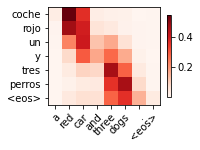

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
#from matplotlib_inline import backend_inline

#backend_inline.set_matplotlib_formats('svg')

def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5),
                  cmap='Reds'):
    """Show heatmaps of matrices."""
    num_rows, num_cols = len(matrices), len(matrices[0])
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize,
                                 sharex=True, sharey=True, squeeze=False)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach(), cmap=cmap)
            ax.set_xticks(np.arange(len(xlabel)))
            ax.set_xticklabels(xlabel)
            ax.set_yticks(np.arange(len(ylabel)))
            ax.set_yticklabels(ylabel)
            if titles:
                ax.set_title(titles[j])
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
    fig.colorbar(pcm, ax=axes, shrink=0.6);


heat = torch.cat(matrix).to(torch.device('cpu'))

heat = heat.unsqueeze(0).unsqueeze(0)

show_heatmaps(heat, xlabel=src.split(' '), ylabel=final)

## BLEU

BLEU es un métrica para analizar la calidad de nuestras traducciones. 
![](https://i.imgur.com/e1Y5gV3.jpg)
![](https://i.imgur.com/AOst2T2.jpg)
![](https://i.imgur.com/t7lFALV.jpg)
![](https://i.imgur.com/WYzVdqB.jpg)

A continuación mostraremos que es lo que debe hacer en pseudo código y luego mostraremos una función para calcularla


* $BLEU$($pred$: `List`, $label$: `List`, $k$: `in`):
    * `if` $length\text{\_}pred< l$: `break`
    * $lenght\text{\_}pred$ ⟵ $longitud(pred)$
    * $lenght\text{\_}label$ ⟵ $longitud(label)$
    * $score$ ⟵ $\exp\left(\min\left(0, 1- \dfrac{lenght\text{\_}label}{lenght\text{\_}pred}\right)\right)$
    * `for` $l$ `in` $range(1, k)$:
        * $NGramas\text{_}pred$ ⟵ $NGramas(pred,~ size = l)$
        * $NGramas\text{_}label$ ⟵ $NGramas(label,~ size = l)$
        * $N$ ⟵ $coincidencias(NGramas\text{\_}pred,~ NGramas\text{\_}label)$
        * $p$ ⟵ $\dfrac{N}{length\text{\_}pred+1-l}$
        * $score$ ⟵ $score \times p^{1/2^l}$
    * `return` $score$

La idea es que BLEU penaliza si no hay coincidencias con N-Gramas, y además penaliza si la oración es demasiado larga. Esto último es porque mientras más larga es una oración, más probable es que acierten los N-Gramas.

In [ ]:
import collections


# convertimos nuestras oraciones en secuencias de palabras
pred_tokens, label_tokens = tgt.split(' '), final

# eliminamos el <eos> de final
label_tokens = label_tokens[:-1]

# calculamos la longitud
len_pred, len_label = len(pred_tokens), len(label_tokens)

# iniciamos el primer valor de puntaje.
score = math.exp(min(0, 1 - len_label / len_pred))

k = 2 # SOLO USAMOS 2-GRAMAS!
# ciclo
for n in range(1, min(k, len_pred) + 1):
    num_matches, label_subs = 0, collections.defaultdict(int)

    for i in range(len_label - n + 1):
        ## Generamos todos los n-gramas de tamaño i para labels
        label_subs[' '.join(label_tokens[i: i + n])] += 1

    for i in range(len_pred - n + 1):
        ## Generamos todos los n-gramas de tamaño i para labels
        if label_subs[' '.join(pred_tokens[i: i + n])] > 0:
            #contamos coincidencias.
            num_matches += 1
            label_subs[' '.join(pred_tokens[i: i + n])] -= 1

    # actualizamos score
    score *= math.pow(num_matches / (len_pred - n + 1), math.pow(0.5, n))

print(score)


0.8801117367933934


## Beam Search

Hasta aquí, para la predicción hemos usado lo que se llama "greed search" elegimos siempre "el mejor" ejemplo. Sin embargo , esto no siempre es una buena estrategia. Por esto, es necesario presentar otras formas de generar predicciones.

![](https://i.imgur.com/Yrrg0zq.gif)